In [40]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px


In [41]:
def snipsnip(tube):
    return tube.split(" ")[0]

<AxesSubplot:xlabel='Timestamp'>

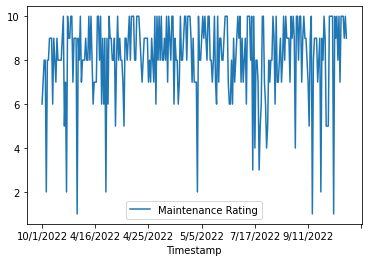

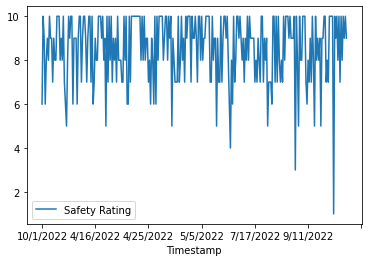

In [42]:
data = pd.read_csv("2022 Centennial Park User Survey (Responses)-2.xlsx - Form Responses 1.csv", usecols = ['Timestamp','On a scale of 1 to 10, with 1 being "Very poorly" and 10 being "Very well", how do you feel that the Park is maintained?','On a scale of 1-10, with 1 being "Not safe at all" and 10 being "Very safe", how safe do you feel in the Park?'])

data=data.rename(columns={'On a scale of 1 to 10, with 1 being "Very poorly" and 10 being "Very well", how do you feel that the Park is maintained?': "Maintenance Rating", 'On a scale of 1-10, with 1 being "Not safe at all" and 10 being "Very safe", how safe do you feel in the Park?': "Safety Rating"})

for i in data['Timestamp']:
    data=data.replace(to_replace = i, value = snipsnip(i))

data = data.sort_values("Timestamp")
    
data.plot( 'Timestamp' , 'Maintenance Rating')
data.plot( 'Timestamp' , 'Safety Rating')

In [43]:
months = np.array([])
safetyRating = []
mainRating = []

currM = 0
currS = 0
count = 0
last = -1

for i, j in data.iterrows():
    month = int(j['Timestamp'].split("/")[0])
#     print(month)
    if(last != month):
        if(last != -1):
            months=np.append(months, last)
            safetyRating.append(currM/count)
            mainRating.append(currS/count)
        last = month
        currM = 0
        currS = 0
        count = 0
    currM += j['Maintenance Rating']
    currS += j['Safety Rating']
    count += 1

if(count != 0):
    months=np.append(months, last)
    safetyRating.append(currM/count)
    mainRating.append(currS/count)

print(months)
print(safetyRating)
print(mainRating)

[10. 11. 12.  4.  5.  6.  7.  8.  9.]
[7.576923076923077, 8.166666666666666, 8.0, 8.287671232876713, 8.48076923076923, 8.222222222222221, 7.3076923076923075, 8.64516129032258, 8.051282051282051]
[8.346153846153847, 8.666666666666666, 9.0, 8.643835616438356, 8.846153846153847, 8.222222222222221, 8.153846153846153, 8.709677419354838, 8.384615384615385]


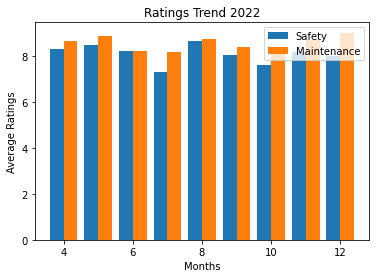

In [44]:
# create data
x = months
y1 = safetyRating
y2 = mainRating
width = 0.40
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)
plt.xlabel("Months")
plt.ylabel("Average Ratings")
plt.legend(["Safety", "Maintenance"])
plt.title("Ratings Trend 2022")
plt.show()

In [45]:
months = np.array(['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [46]:
fig2 = px.scatter(x = safetyRating, y = mainRating, color = months, 
                  labels = {
                      'x' : "Safety Rating",
                      'y': "Maintainance Rating",
                      'color': "Month",
                   },
                title = "Safety and Maintaince Ratings Across Months"
                )
                 
fig2.show()